# CaaR package examples

#### Release 4.0 (Beta)

In [1]:
%cd '/home/nick/Documents/Research/thermo'

/home/nick/Documents/Research/thermo


In [2]:
import datetime as dt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import caar as cr

%matplotlib inline

In [3]:
import seaborn as sns; sns.set(color_codes=True)

### Overview

This introduction to CaaR shows how delimited text files are converted into indexed time series.

The functionality applies to any text file with time stamped data observations (scalars or vectors).

A plot of a multi-dimensional time series (operating status for an air conditioner and indoor temperatuure) is shown, based on the output of a CaaR time series function.

With CaaR, text files only need to be read once in order to be converted into Python variables. The user can use the pickle_from_file() function to create a pickle file (binary) from a text file. CaaR can convert pickle files created this way into a pandas DataFrame at any time. This is significantly faster than reading raw text files into pandas directly.

CaaR offers functions for summarizing and analyzing the data, and can convert DataFrames into NumPy time series index arrays and data arrays.

To explore the capabilities in full, see the documentation at http://caar.readthedocs.org

### Read original text files into key-value pairs (dicts)

The **pickle_from_file()** and **dict_from_file()** functions convert delimited text files (comma- or tab-delimited) into key-value pairs (Python dicts). If the data covers multiple states, the output may be restricted to a particular states or states (using a comma-separated set of state abbreviations).

See example .csv data files in the data folder at https://github.com/nickpowersys/caar

The use of the *states* parameter is optional, and depends on sensor and postal metadata files (examples are also in the data folder in the Github repository).

#### Raw data files

Each data file is handled independently.

This example shows each of the three types of data files CaaR can handle. If only one or two of these types of data are available, the other(s) is (are) not required.

The types are

* cycle device operations
* sensor data from a sensor or sensors
* geospatial data identified by location instead of by sensor (such as weather from an external/API source)

The following are specific examples of the general categories described:

In [4]:
cycles = 'cycles.csv'         # Cycling device operations (in this example, air conditioners)
inside_temps = 'inside.csv'   # Sensor data from sensors (in this case, building thermostats)
outside_temps = 'outside.csv' # Temperatures associated with locations instead of sensors

#### Optional parameters

In [5]:
cycle_mode = 'Cool' # for selecting only particular operation modes

states = 'TX' # state or states, such as 'TX,CA[,ST]'

thermostats_file = 'thermostats.csv' # A metadata file is needed when 'states' parameter is used.
postal_file = 'us_postal_codes_clean.csv' # Needed when 'states' parameter is used.

# These files are both in the caar repository in the data folder to serve as examples.

This dict is used to avoid having to re-state optional arguments for each type of data.

In [6]:
kwargs = {'cycle':cycle_mode, 'states':states, 'sensors_file':thermostats_file, 'postal_file':postal_file}

#### Function detect_columns() - summarize file content automatically (optional)

The output summarizes file contents, without requiring the user to open the files themselves.

**Required:** Before detect_columns(), pickle_from_file() and dict_from_file(), specify type of data with the auto keyword parameter and any of the arguments: 'cycles', 'inside', 'outside'

In [8]:
kwargs['auto'] = 'cycles'

In [9]:
cr.detect_columns(cycles, **kwargs)

OrderedDict([('id',
              {'heading': 'ThermostatId', 'position': 0, 'type': 'ints'}),
             ('cycle',
              {'heading': 'CycleType', 'position': 1, 'type': 'alpha_only'}),
             ('start_time',
              {'heading': 'StartTime', 'position': 2, 'type': 'time'}),
             ('end_time',
              {'heading': 'EndTime', 'position': 3, 'type': 'time'}),
             ('Minutes',
              {'heading': 'Minutes', 'position': 4, 'type': 'floats'}),
             ('kwH', {'heading': 'kwH', 'position': 5, 'type': 'floats'}),
             ('BTUs', {'heading': 'BTUs', 'position': 6, 'type': 'floats'})])

#### Ignore columns (optional) when creating pandas DataFrames and NumPy arrays (0-based positions or headings) 

In [10]:
kwargs['cols_to_ignore'] = [4, 5, 6]

In [11]:
cr.detect_columns(cycles, **kwargs)

OrderedDict([('id',
              {'heading': 'ThermostatId', 'position': 0, 'type': 'ints'}),
             ('cycle',
              {'heading': 'CycleType', 'position': 1, 'type': 'alpha_only'}),
             ('start_time',
              {'heading': 'StartTime', 'position': 2, 'type': 'time'}),
             ('end_time',
              {'heading': 'EndTime', 'position': 3, 'type': 'time'})])

#### Function pickle_from_file() - create file once to allow quick conversion to pandas and NumPy

In [12]:
cycles_pickle = cr.pickle_from_file(cycles, **kwargs)

The function return value holds the file name as a string.

In [13]:
print(cycles_pickle)

TX_cycles.pickle


In [14]:
kwargs['auto'] = 'sensors'

In [15]:
kwargs['cols_to_ignore'] = None

In [16]:
cr.detect_columns(inside_temps, **kwargs)

OrderedDict([('id',
              {'heading': 'ThermostatId', 'position': 0, 'type': 'ints'}),
             ('time', {'heading': 'LogDate', 'position': 1, 'type': 'time'}),
             ('Degrees',
              {'heading': 'Degrees', 'position': 2, 'type': 'ints'})])

In [17]:
inside_pickle = cr.pickle_from_file(inside_temps, **kwargs)

In [18]:
kwargs['auto'] = 'geospatial'

In [19]:
cr.detect_columns(outside_temps, **kwargs)

OrderedDict([('id', {'heading': 'LocationId', 'position': 0, 'type': 'ints'}),
             ('time', {'heading': 'LogDate', 'position': 1, 'type': 'time'}),
             ('Degrees',
              {'heading': 'Degrees', 'position': 2, 'type': 'ints'})])

In [20]:
outside_pickle = cr.pickle_from_file(outside_temps, **kwargs)

Names of binary files from ct.pickle_from_file() are automatically created unless specified using the picklepath keyword argument.

For example: kwargs['picklepath'] = 'my_cycle_file.pickle' can be specified before executing.

In [21]:
for f in [cycles_pickle, inside_pickle, outside_pickle]:
    print(f)

TX_cycles.pickle
TX_sensors.pickle
TX_geospatial.pickle


#### Function random_record() - selects data observation for inspection

In [22]:
random_inside = cr.random_record('TX_sensors.pickle', value_only=False)

The index for records containing sensor-type observations is based on an ID and a time stamp.

In [23]:
random_inside # The value of the data observation is 75.

(Sensor(sensor_id=240, timestamp=datetime.datetime(2012, 9, 21, 18, 38, 8)),
 75)

#### Function dict_from_file() - alternative to creating pickle file

An example of selecting a random data observation from a dict (instead of a pickle file holding a dict) follows.

Note the use of column headings to ignore some columns (above, integers indicating column positions were used).

In [24]:
kwargs['auto'] = 'cycles'
kwargs['cols_to_ignore'] = ['Minutes', 'kwH', 'BTUs']
cycles_dict = cr.dict_from_file(cycles, **kwargs)
random_cycles = cr.random_record(cycles_dict, value_only=False)

If the data contain two time stamps per record and the argument `auto='cycles'` is used, record keys are based on 

1. a device or sensor ID 
2. a cycle mode if one has been specified, otherwise this part of the index is left as 'None'
3. the first time stamp in the records (from left to right): the start time

The value is the second time stamp, or ending time of the cycle.

In [25]:
random_cycles

(Cycle(device_id=520, cycle_mode='Cool', start_time=datetime.datetime(2012, 7, 9, 3, 20, 30)),
 datetime.datetime(2012, 7, 9, 3, 23, 31))

In [26]:
kwargs['auto'] = 'outside'
kwargs['cols_to_ignore'] = None
random_outside = cr.random_record(outside_pickle, value_only=False)

In this example, the value of 55 is an outdoor temperature.

In [27]:
random_outside

(Geospatial(location_id=520, timestamp=datetime.datetime(2013, 4, 4, 22, 30, 49)),
 55)

The only difference between the dict_from_file() and pickle_from_file() functions is that pickle_from_file() creates a pickle file, which allows faster read access in later sessions than text files.

With both functions, the output can be an input to the DataFrame creation functions, which are described next.

### Reading dicts into pandas DataFrames

Using the pickle file or dict (like cycles_dict above) as input, there is one function for each kind of data (for cycles, indoor temperatures, or outdoor temperatures) that creates a pandas DataFrame.

In [28]:
cycles_pickle = 'TX_cycles.pickle'
inside_pickle = 'TX_sensors.pickle'
outside_pickle = 'TX_geospatial.pickle'

In [29]:
cycles_df = cr.create_cycles_df(cycles_pickle)

In [30]:
cycles_df.head()

EndTime
ThermostatId CycleType StartTime                              
24           Cool      2011-07-03 20:55:20 2011-07-03 21:06:20
                       2011-07-05 20:53:45 2011-07-05 21:03:51
                       2011-07-05 21:36:45 2011-07-05 21:46:54
                       2011-07-05 22:25:46 2011-07-05 22:34:46
                       2011-07-05 23:29:47 2011-07-05 23:37:47

In [31]:
inside_df = cr.create_sensors_df(inside_pickle)

All column heading come directly from the original raw text files.

In [32]:
inside_df.head()

Degrees
ThermostatId LogDate                     
24           2011-07-03 20:39:02       84
             2011-07-03 20:55:20       85
             2011-07-03 21:00:20       84
             2011-07-05 20:54:45       85
             2011-07-05 21:00:45       84

In [33]:
outside_df = cr.create_geospatial_df(outside_pickle)

In [34]:
outside_df.head()

Degrees
LocationId LogDate                     
12         2011-06-27 00:06:08       91
           2011-08-23 09:45:15       80
           2011-08-23 09:57:25       80
           2011-08-23 10:17:13       84
           2011-08-23 10:22:13       80

### Summarizing DataFrames

Additional functions summarize the extent of data observations across any date range, and within days. These functions can analyze the data for groups of thermostats or filter the data by thermostat ID or location ID. This supports the creation of a data pipeline for further analysis.

The functions included in the example as well as all of the other functions in the public API are described in the documentation.

#### Function df_select_ids() can take either scalar or list of ids as an argument

View individual thermostat data (cycles or inside temperatures) or outside temperatures:

In [35]:
cycles_df_240 = cr.df_select_ids(cycles_df, 240) # ID for thermostat is 240

In [36]:
cycles_df_240.head()

EndTime
ThermostatId CycleType StartTime                              
240          Cool      2012-03-15 17:17:22 2012-03-15 17:34:22
                       2012-03-15 17:51:22 2012-03-15 18:06:22
                       2012-03-15 18:21:22 2012-03-15 18:27:37
                       2012-03-15 18:37:22 2012-03-15 18:54:22
                       2012-03-15 19:12:22 2012-03-15 19:26:22

#### Function df_select_datetime_range() selects a range based on either string-formatted datetimes or datetime.datetime values.

It can be applied whether or not df_select_ids() has been applied.

In [37]:
cr.df_select_datetime_range(cycles_df_240, '2012-06-01 15:00:00','2012-06-01 20:00:00')

EndTime
ThermostatId CycleType StartTime                              
240          Cool      2012-06-01 15:46:27 2012-06-01 16:19:26
                       2012-06-01 17:01:42 2012-06-01 17:56:27
                       2012-06-01 18:34:27 2012-06-01 19:12:28

In [38]:
inside_df_240 = cr.df_select_ids(inside_df, 240)

In [39]:
inside_df_240 = cr.df_select_datetime_range(inside_df_240, '2012-07-11 14:00:00', '2012-07-11 16:00:00')

In [40]:
inside_df_240.head()

Degrees
ThermostatId LogDate                     
240          2012-07-11 14:00:28       77
             2012-07-11 14:04:26       76
             2012-07-11 14:15:23       75
             2012-07-11 14:28:19       76
             2012-07-11 14:44:14       77

#### Selecting ID and slicing on date ranges (pure pandas approach)

In [41]:
idx = pd.IndexSlice

Sensor data in a DataFrame can be selected based on a sensor ID or IDs (through slicing) and/or a date range.

In [42]:
inside_df.loc[idx[240,'2012-07-11 11:45:00':'2012-07-11 16:30:00'],:].head()

Degrees
ThermostatId LogDate                     
240          2012-07-11 11:55:47       77
             2012-07-11 12:02:45       78
             2012-07-11 12:16:41       77
             2012-07-11 12:23:39       76
             2012-07-11 12:34:35       75

Note that because the cycles DataFrame has one more column in the index for the cycle mode, the slice has an additional ':' between the sensor ID of 240 (in this case, the sensor is a thermostat) and the date range.

In [43]:
cycles_df.loc[idx[240,:,'2012-07-11 11:45:00':'2012-07-11 16:30:00'],:].head()

EndTime
ThermostatId CycleType StartTime                              
240          Cool      2012-07-11 11:55:47 2012-07-11 12:28:37
                       2012-07-11 13:35:35 2012-07-11 14:08:25
                       2012-07-11 14:40:15 2012-07-11 15:21:02

#### Function location_id_of_thermo() - location of thermostat, if available

See example data file assigned to the variable thermostats_file in the Github repository

In [44]:
location_id = cr.location_id_of_sensor(240, thermostats_file)

Outside temperatures at thermostat location

In [45]:
outside_temps_240 = cr.df_select_ids(outside_df, location_id)

In [46]:
outside_temps_240 = cr.df_select_datetime_range(outside_temps_240, '2012-07-11 14:30:00', '2012-07-11 16:30:00')

In [47]:
outside_temps_240.head()

Degrees
LocationId LogDate                     
70         2012-07-11 14:52:11       84
           2012-07-11 15:12:05       88
           2012-07-11 16:11:47       75

Pure pandas approach

In [48]:
outside_df.loc[idx[location_id,'2012-07-11 14:30:00':'2012-07-11 16:30:00'],:].head()

Degrees
LocationId LogDate                     
70         2012-07-11 14:52:11       84
           2012-07-11 15:12:05       88
           2012-07-11 16:11:47       75

#### Function days_of_data_by_id()

Number of days with data per ID (in cycles data, IDs are assigned to thermostats)

In [49]:
days_cycle_data_by_id = cr.days_of_data_by_id(cycles_df)

In [50]:
days_cycle_data_by_id[0:2]

,Days
ThermostatId,
24,18
31,11


#### Function df_select_ids()

In this example, select records for a list of IDs instead of a single ID

In [51]:
cr.df_select_ids(days_cycle_data_by_id, [92,93])

,Days
ThermostatId,
92,215
93,234


#### Function daily_data_points_by_id()

Shows count of daily observations for a DataFrame for an ID

In [52]:
daily_data_240 = cr.daily_data_points_by_id(inside_df, id=240)

In [53]:
daily_data_240.head()

Degrees
ThermostatId LogDate            
240          2011-11-17       30
             2011-11-18       55
             2011-11-19       19
             2011-11-20       29
             2011-11-21        3

In [54]:
daily_data_240.columns = ['Temperature Readings (Count)']
daily_data_240.head()

Temperature Readings (Count)
ThermostatId LogDate                                 
240          2011-11-17                            30
             2011-11-18                            55
             2011-11-19                            19
             2011-11-20                            29
             2011-11-21                             3

### Thermostat operations and temperature - plot as time series

**time_series_cycling_and_temps()**, **plot_cycles_xy** and **plot_temps_xy**

The output of time_series_cycling_and_temps() is used as input to the plot_cycles_xy() and plot_temps_xy() functions.

In [55]:
start = dt.datetime(2012, 7, 11, 11, 0)
end = dt.datetime(2012, 7, 11, 19, 0)
cycles_and_temps_240 = cr.cycling_and_obs_arrays(cycles_df=cycles_df, cycling_id=240, start=start, end=end,
                                                 sensors_df=inside_df, sensor_id=240, freq='1min')

In [56]:
cycles_x, cycles_y = cr.plot_cycles_xy(cycles_and_temps_240)
temps_x, temps_y = cr.plot_sensor_geo_xy(cycles_and_temps_240)

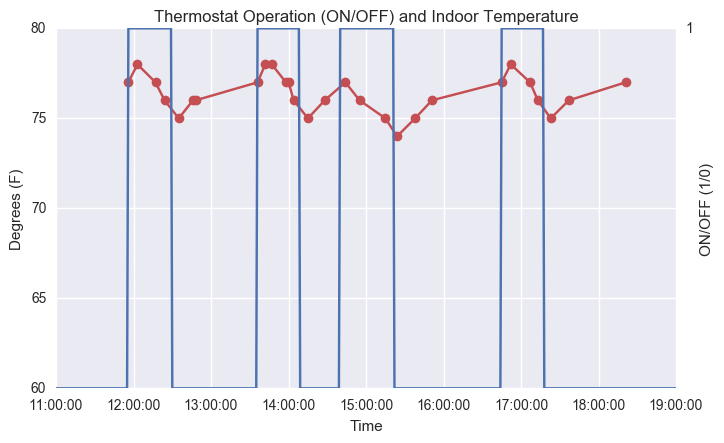

In [57]:
fig, ax1 = plt.subplots()

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax1.set_ylim(60.0,80.0)
ax1.set_xlabel('Time')
ax1.set_ylabel('Degrees (F)')
ax1.plot(temps_x, temps_y, marker='o', color='r')
ax2 = ax1.twinx()
ax2.set_ylim(0.0, 1.)
ax2.set_ylabel('ON/OFF (1/0)')
ax2.set_yticks([1.0])
ax2.yaxis.grid(False)
ax2.plot(cycles_x, cycles_y)
fig.set_size_inches(8, 4.5)
plt.title('Thermostat Operation (ON/OFF) and Indoor Temperature')
plt.show() # Note: timestamps in underlying data are from polling processes that have up to a minute delay.